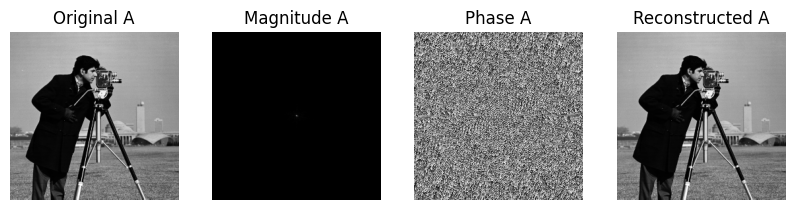

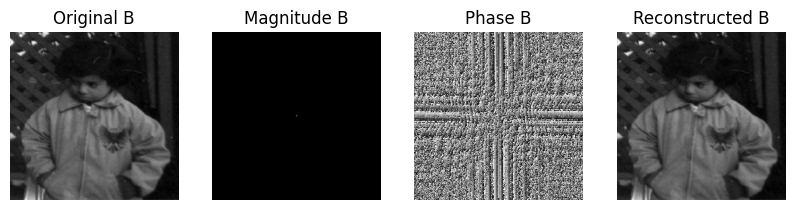

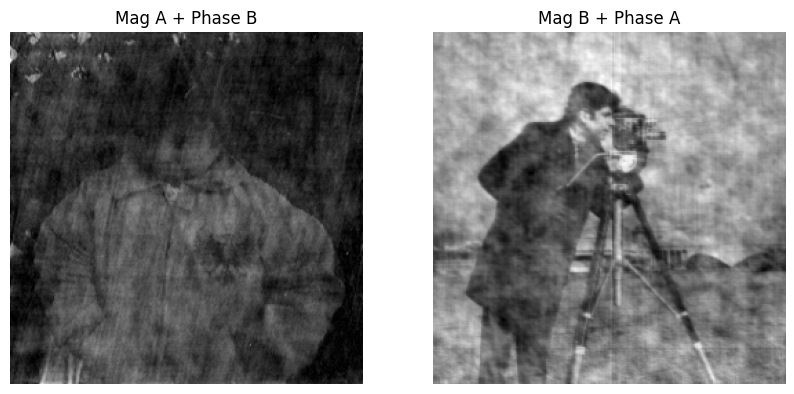

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_fourier_transform(image_path, target_size=(256, 256)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size)  # Resize to common shape
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude = np.abs(f_shift)
    phase = np.angle(f_shift)
    return image, f_shift, magnitude, phase

def reconstruct_image(magnitude, phase):
    complex_image = magnitude * np.exp(1j * phase)
    f_ishift = np.fft.ifftshift(complex_image)
    reconstructed = np.fft.ifft2(f_ishift)
    return np.abs(reconstructed)

def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Load images and compute Fourier Transform
image_A, f_A, mag_A, phase_A = compute_fourier_transform('cameraman.tif')
image_B, f_B, mag_B, phase_B = compute_fourier_transform('pout.tif')

# Reconstruct images from magnitude and phase
recon_A = reconstruct_image(mag_A, phase_A)
recon_B = reconstruct_image(mag_B, phase_B)

display_images([image_A, mag_A, phase_A, recon_A], ['Original A', 'Magnitude A', 'Phase A', 'Reconstructed A'])
display_images([image_B, mag_B, phase_B, recon_B], ['Original B', 'Magnitude B', 'Phase B', 'Reconstructed B'])

# Swap magnitude and phase
swap_A_mag_B_phase = reconstruct_image(mag_A, phase_B)
swap_B_mag_A_phase = reconstruct_image(mag_B, phase_A)

display_images([swap_A_mag_B_phase, swap_B_mag_A_phase], ['Mag A + Phase B', 'Mag B + Phase A'])